# Introduction to Monte Carlo

Perhaps the best way to introduce a technique as general as Monte Carlo is to consider a very specific motivating example to demonstrate the technique, and then branch out.

## 1D integrals

A general one-dimensional integral may be written as, $$I = \int_{a}^{b} f(x) dx.$$

For concreteness, let us consider a relatively simple example, $$I = \int_{0}^{\pi} x \sin x ~ dx.$$

Here $a = 0$, $b = \pi$ , and $f(x) = x \sin x$.

In [1]:
# Standard Imports
import numpy as np
np.random.seed(0)
import sympy as sp
sp.init_printing(use_latex='mathjax') 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Custom plot settings
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 'Large'
mpl.rcParams['xtick.labelsize'] = 'Large'
mpl.rcParams['ytick.labelsize'] = 'Large'

# Jupyter Notebook Settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

The first thing we should do, whenever possible, is to look at the function. This is what it looks like. It reminds me of a roller-coaster.

Text(0,0.5,'f(x) = x sin x')

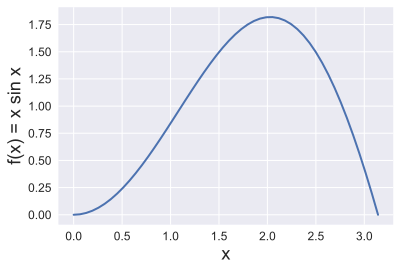

In [2]:
xi = np.linspace(0,np.pi)
fx = xi * np.sin(xi)
plt.plot(xi, fx)
plt.xlabel('x', fontsize='18')
plt.ylabel('f(x) = x sin x', fontsize='18')

This function can be integrated analytically. It turns out,

In [3]:
# Indefinite Integral
x = sp.symbols('x')
f = x * sp.sin(x)
f.integrate(x)

-x⋅cos(x) + sin(x)

In [4]:
# Definite Integral
sp.integrate(f, (x, 0, sp.pi))

π

### Average value of the Integrand

One way to think about the integral is in terms of the average value of the function over the domain.

If $\bar{f}$ is the average value, then the integral (the area under the curve) is, $$I = \int_{a}^{b} f(x) dx = \bar{f} \cdot (b - a).$$ Indeed one can think about the average value as:

$$\bar{f} = \dfrac{\int_{a}^{b} f(x) dx}{\int_{a}^{b} dx} = \dfrac{\int_{a}^{b} f(x) dx}{(b-a)}$$

In this example, the average value is $\bar{f} = 1$. Hence the integral is $I = 1 (\pi - 0) = \pi$.

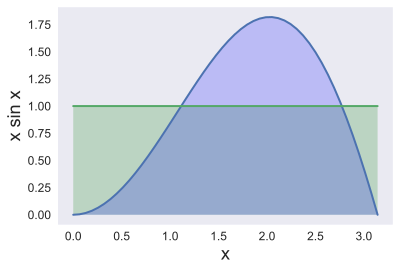

In [5]:
xi = np.linspace(0,np.pi)
fx = xi * np.sin(xi)
plt.plot(xi, fx, xi, np.ones(len(xi)))
plt.xlabel('x', fontsize='18')
plt.ylabel('x sin x', fontsize='18')
plt.fill_between(xi, 0, np.ones(len(xi)), facecolor='green', alpha=0.2)
plt.fill_between(xi, 0, fx, facecolor='blue', alpha=0.2)
plt.grid()

The areas under the blue curve, and under the green (average) line is equal. If we know the size of the domain, then solving the integral amounts to finding the average value of the integrand over the domain.

One way to find the average may be to just pick equispaced points along the domain, and take a simple average. If you are a systematic person, you may prefer this "clean" method.

If you are like me, and think "linearity is boring!", you may pick points in the region $[a, b]$ randomly. Right now, this probably seems like a stupid idea.

And we'll shortly show that it is!

In [6]:
def equispacedAverage(npts):
    xi = np.linspace(0, np.pi, npts)
    fi = xi * np.sin(xi)
    return np.mean(fi)

def randomAverage(npts):
    xi = np.random.uniform(0, np.pi, npts)
    fi = xi * np.sin(xi)
    return np.mean(fi)

In [7]:
npts = 5
print(equispacedAverage(npts))

0.758447559175


In [8]:
npts = 10
print(equispacedAverage(npts))

0.890842865047


In [9]:
npts = 5
print(randomAverage(npts))

1.6480095762


Let us change the number of points over which we average systematically between 1 and 200. Yeah, I know, this is boring, but sometimes this is what it takes to see patterns.

In [10]:
npts = np.arange(1,200,2)
eqAvg  = np.zeros(npts.shape)
rndAvg = np.zeros(npts.shape)

for i in range(len(npts)):
    eqAvg[i] = equispacedAverage(npts[i])
    rndAvg[i] = randomAverage(npts[i])

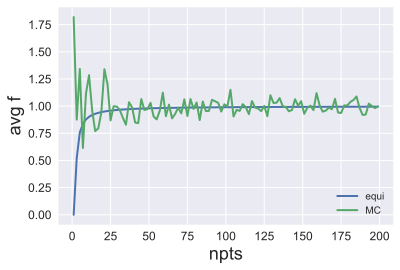

In [11]:
plt.plot(npts, eqAvg, label='equi')
plt.plot(npts, rndAvg, label='MC')
plt.xlabel('npts', fontsize=18)
plt.ylabel('avg f', fontsize=18)
plt.legend(loc='lower right')

Note that both the equispaced and random choices "converge" to the expected value of 1 (one systematically, the other less systematically). Perhaps you expected to see something like this!

And, yes, you were right! Picking points randomly doesn't look like a bright idea. It requires more work (generating random numbers isn't free), and produces a worse answer. This is the worst of both worlds!

If anyone comes to sell you such an algorithm, I have one piece of advice.

Run!

But let's not give up just yet, because something very interesting is going to come up pretty soon. Let's try to do some post-mortem. Let's (i) plot the absolute error (we know $\bar{f} = 1$ is the true answer), and (ii) visualize it on a log-log plot, and see what secrets it reveals.

In [12]:
npts = np.logspace(2,5,100, dtype=int)
eqAvg  = np.zeros(npts.shape)
rndAvg = np.zeros(npts.shape)

for i in range(len(npts)):
    eqAvg[i] = equispacedAverage(npts[i])
    rndAvg[i] = randomAverage(npts[i])

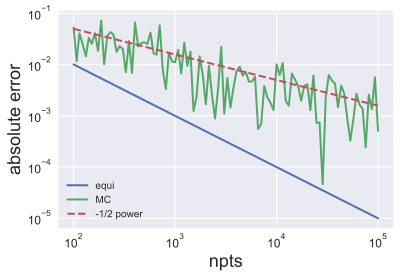

In [13]:
plt.loglog(npts, np.abs(eqAvg-1), label='equi')
plt.loglog(npts, np.abs(rndAvg-1), label='MC')
plt.loglog(npts, 0.5/np.sqrt(npts), '--', label='-1/2 power')
plt.xlabel('npts', fontsize=18)
plt.ylabel('absolute error', fontsize=18)
plt.legend(loc='lower left')

The error in the equispaced estimate $$\epsilon_{es} \sim \frac{1}{N}$$

The error in the MC estimate $$\epsilon_{mc} \sim \frac{1}{\sqrt{N}}$$

I won't go into details here, but these dependencies of the error with $N$ have been derived by other people.

To derive the first, you need to do a Taylor series expansion. In fact, there is an entire family of integration methods called Newton-Cotes for 1D integration which are based on the Taylor series. You may have heard of trapezoidal rule or Simpson's rule. These "rules" are first-cousins of the method we used.

To derive the error for MC relies on an amazing theorem called the central limit theorem. We will postpone discussion of the CLT for now.

I should point out that the form in which error decays with $N$ is general. That is it is not restricted to the particular function $f(x) = x \sin x$ that we investigated.

## 2D Integrals

Now let us consider the classic problem of finding the area of a circle using Monte Carlo.

This is also sometimes called "integration by darts"

We want to compute the integral:

$$I = \int_{-1}^{1} \int_{-1}^{1} g(x_1, x_2) dx_1 dx_2,$$

where $$g(x) = \begin{cases} 1, \text{ if } x_1^2 + x_2^2 \leq 1 \\ 0, \text{ otherwise}.\end{cases}$$

Thus, the area of the circle is the average value $\bar{g}$ times the size of the domain, which in this case is $[-1, 1]^2 = 2 \times 2 = 4$.

Thus area of circle = $4 \bar{g}$. 

Let us throw 1000 darts, and get an estimate of the area of the circle. Note that the true answer is $\pi r^2 = \pi$, since the cicle has a radius equal to 1.

In [14]:
def MCdarts(npts, isPlot=False): 
    """Function outputs average value of g,
   given npts # of darts to throw randomly

   input : #darts, visualize
   output: average value of g
       """
    x1 = np.random.uniform(-1,1,size=npts)
    x2 = np.random.uniform(-1,1,size=npts)
    cond = x1**2 + x2**2 <= 1
    if isPlot: # toggle to visualize darts 
        plt.plot(x1[cond],x2[cond],'o') 
        plt.plot(x1[~cond],x2[~cond],'o') 
        plt.xlim(-1,1); plt.ylim(-1,1) 
        plt.xlabel('$x_1$', fontsize=18) 
        plt.ylabel('$x_2$', fontsize=18) 
        plt.gca().set_aspect('equal')
    return np.sum(cond)/float(npts)

Area of cirlce: 3.088


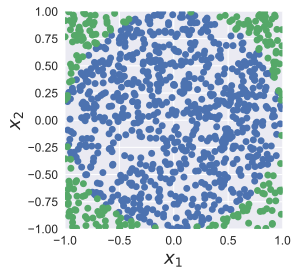

In [15]:
print('Area of cirlce: {}'.format(4*MCdarts(1000,isPlot=True)))

Close enough.

Because the process is stochastic, the answer is not fixed. It depends on the random numbers used.

To quantify this variability, let us repeat this experiment of throwing 1000 darts many times, where many=100 for concreteness.

Average Area: 3.1379599999999988


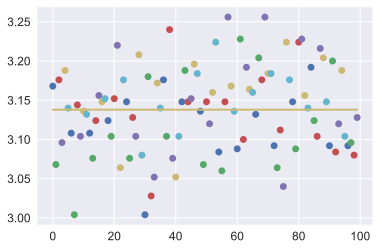

In [16]:
SumArea = 0
for i in range(100):
    area = 4 * MCdarts(1000)
    SumArea += area
    plt.plot(i,area,'o')

AvgArea = SumArea/100
print ('Average Area: {}'.format(AvgArea))

plt.plot(range(100),np.ones(100)*AvgArea,'-')

Note that there is considerable variation in the estimates, but the mean is again surprisingly close to $\pi$.

The magic of the CLT is again at work in the background.

However, we note for future reference that analyzing the result of a MC calculation will require a careful consideration of this inherent variability.

Now let us go back to throwing darts in a systematic "grid"-like fashion

In [17]:
def equiDarts(ngrid, isPlot=False):
    """total number of points are npts = ngrid*ngrid"""
    x = np.linspace(-1, 1, ngrid)
    x1, x2 = np.meshgrid(x,x)

    cond = x1**2 + x2**2 <= 1
    
    if isPlot:
        plt.plot(x1[cond],x2[cond],'o')
        plt.plot(x1[~cond],x2[~cond],'o')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel('$x_1$', fontsize=18)
        plt.ylabel('$x_2$', fontsize=18)
        plt.gca().set_aspect('equal')
    
    npts = ngrid*ngrid
    
    y = np.sum(cond,axis=0)
    y = np.sum(y)
    
    return y/float(npts) 

Let us get an estimate by throwing approximately 1000 darts.

Area of circle: 2.942040816326531


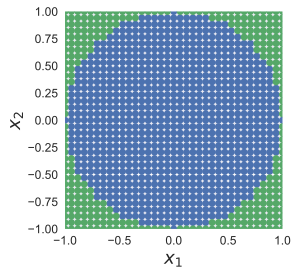

In [18]:
print ('Area of circle: {}'.format(4*equiDarts(35, isPlot=True)))

Now, let us compare the systematic method with the MC method, as we did for the 1D example.

Recall that for 1D the systematic brutally beat MC.

In [19]:
ngrid = np.logspace(0,3,100, dtype=int)
npts  = ngrid**2
eqAvg  = np.zeros(npts.shape)
rndAvg = np.zeros(npts.shape)

for i in range(len(npts)):
    rndAvg[i]  = 4 * MCdarts(npts[i])
    eqAvg[i] = 4 * equiDarts(ngrid[i])

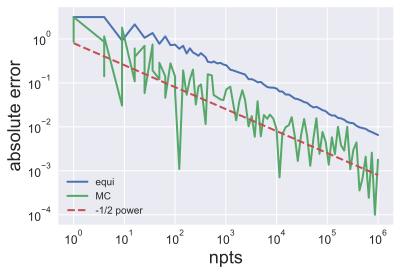

In [20]:
plt.loglog(npts, np.abs(eqAvg-np.pi), label='equi')
plt.loglog(npts, np.abs(rndAvg-np.pi), label='MC')
plt.loglog(npts, 0.8/np.sqrt(npts), '--', label='-1/2 power')
plt.xlabel('npts', fontsize=18)
plt.ylabel('absolute error', fontsize=18)
plt.legend(loc='lower left')

Hmm. I bet you did not expect that.

What a big difference one additional dimension makes! Let's enumerate our observations.

1. The error in both the methods now goes down as $N^{-1/2}$.
2. Since the function $g(x)$ is no longer smooth near the edges, the error in the systematic method no longer decays smoothly
3. In fact it can be shown that the error in MC goes as $\epsilon \sim N^{-1/2}$ regardless of dimension, while that of *any* systematic "quadrature" method goes as $\epsilon \sim N^{-p_{1d}/d}$, where $p_{1d}$ is the so called convergence of the method for 1d problems.

This is called the curse of dimensionality.

But it is only a curse, if you are systematic.

Many, many, many important computational problems in science and engineering are very high-dimensional (number of dimensions ~ number of atoms in the universe). We will see some of these in class.

Welcome to Monte Carlo.